In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

df = pd.DataFrame(california.data,columns=california.feature_names)

df['PRICE']=california.target

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [2]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [4]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


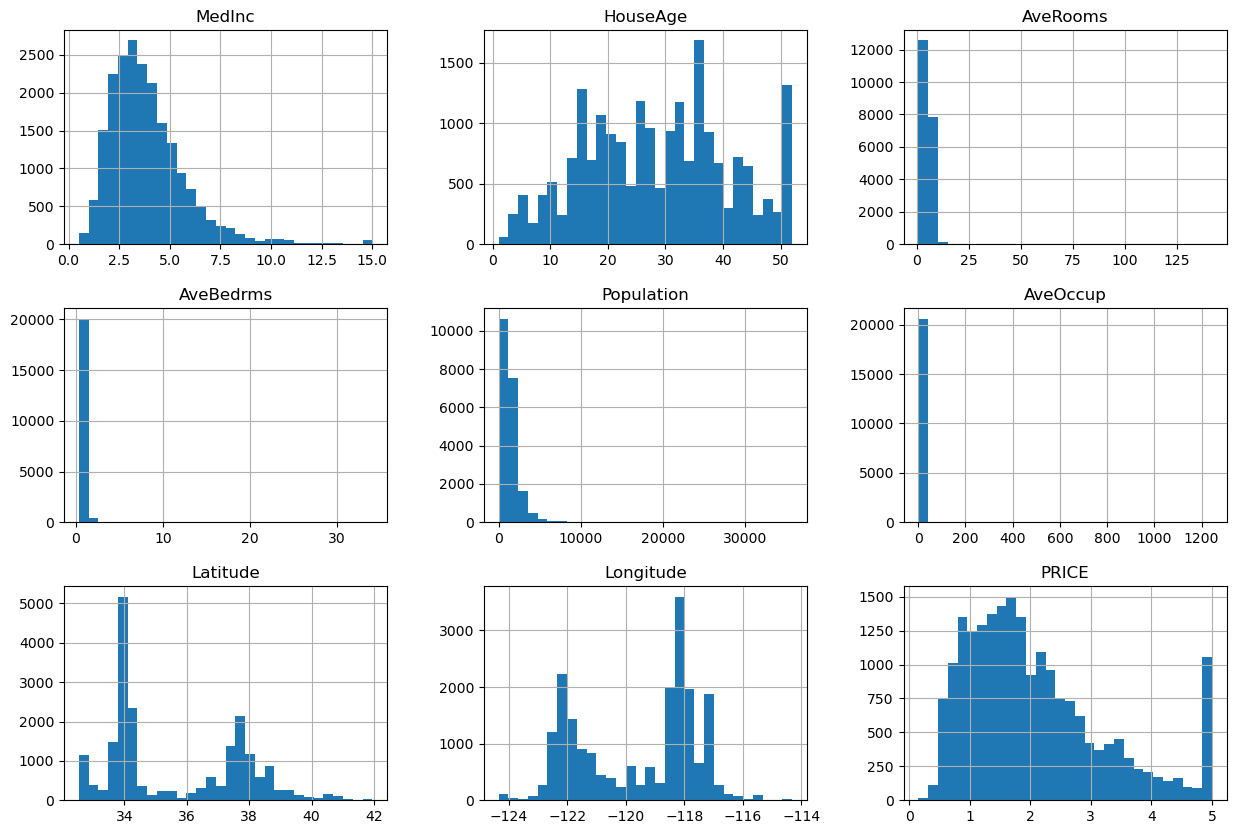

In [5]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15,10))
plt.show()

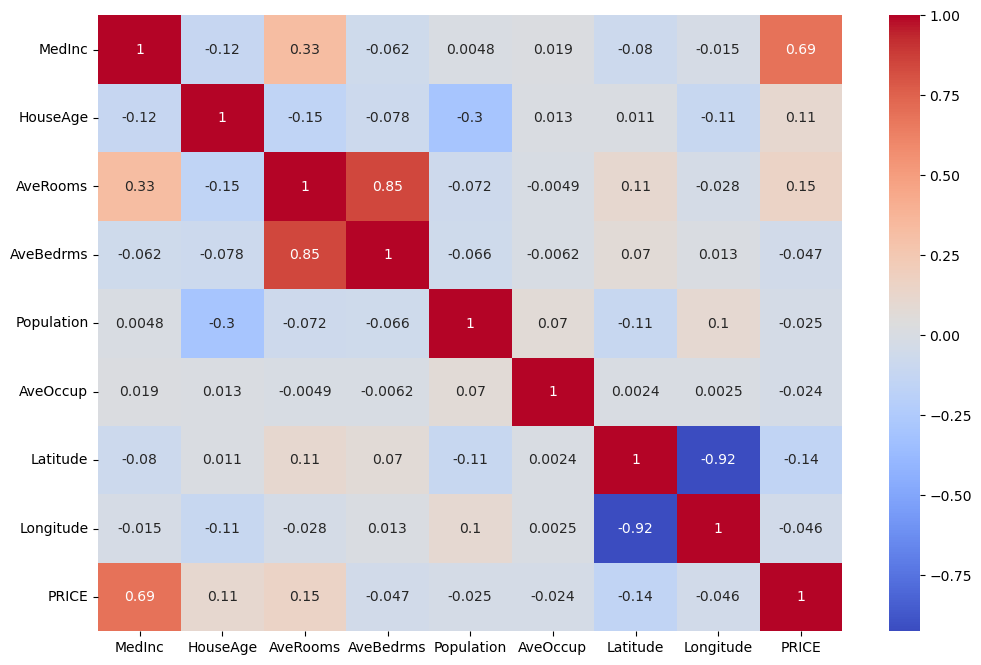

In [13]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


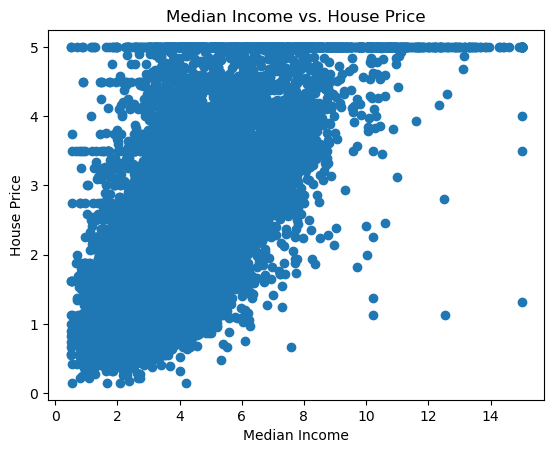

In [15]:
plt.scatter(df['MedInc'],df['PRICE'])
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('Median Income vs. House Price')
plt.show()

In [17]:
correlation = df.corr()['PRICE'].sort_values(ascending=False)
print(correlation)

PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


In [25]:
from sklearn.model_selection import train_test_split

# features(x),target(y)
X=df.drop('PRICE',axis=1) # axis1>drop a col,,axis0>drop a row
y=df['PRICE']

#split data into training and testing sets(80% train, 20%test)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print('Training features shape:',X_train.shape)
print('Training target shape:',y_train.shape)
print('Testing features shape:',X_test.shape)
print('Testing target shape:',y_test.shape)



Training features shape: (16512, 8)
Training target shape: (16512,)
Testing features shape: (4128, 8)
Testing target shape: (4128,)


In [31]:
from sklearn.preprocessing import StandardScaler

#Initilize scaler
scaler = StandardScaler()

#Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('First few scaled training features:\n', X_train_scaled[:5])



First few scaled training features:
 [[-0.326196    0.34849025 -0.17491646 -0.20836543  0.76827628  0.05137609
  -1.3728112   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 -0.12853018 -0.09890135 -0.11736222
  -0.87669601  0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 -0.25753771 -0.44981806 -0.03227969
  -0.46014647 -0.44760309]
 [-1.01786438  0.58654547 -0.60001532 -0.14515634 -0.00743434  0.07750687
  -1.38217186  1.23269811]
 [-0.17148831  1.14200767  0.3490073   0.08662432 -0.48587717 -0.06883176
   0.5320839  -0.10855122]]


In [33]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train_scaled,y_train)

y_pred=model.predict(X_test_scaled)

print('Predicted values:',y_pred[:5])
print('Actual values', y_test[:5])

Predicted values: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
Actual values 20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: PRICE, dtype: float64


In [41]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

# Mean Squared Error
mse = mean_squared_error(y_test,y_pred)

#root mean squared error
rmse = np.sqrt(mse)

#R squared score
r2=r2_score(y_test,y_pred)

print(f'Mean Squared Error(MSE):{mse}')
print(f'Root Mean Squared Error(RMSE):{rmse}')
print(f'R2(r squared) Score{r2}')

Mean Squared Error(MSE):0.5558915986952442
Root Mean Squared Error(RMSE):0.7455813830127763
R2(r squared) Score0.575787706032451


In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,y_train)
dt_predictions = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test,dt_predictions)
dt_rmse = rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_predictions)

print(f'Decision Tree - MSE:{dt_mse},RMSE:{dt_rmse},R2:{dt_r2}')


Decision Tree - MSE:0.495235205629094,RMSE:0.7037294974840077,R2:0.622075845135081


In [57]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)

rf_model.fit(X_train,y_train)
rf_predictions=rf_model.predict(X_test)
rf_mse=mean_squared_error(y_test,rf_predictions)
rf_rmse=np.sqrt(rf_mse)

rf_r2=r2_score(y_test,rf_predictions)

print(f'Random Forest -MSE:{rf_mse},RMSE:{rf_rmse},R2:{rf_r2}')

Random Forest -MSE:0.2553684927247781,RMSE:0.5053399773665033,R2:0.8051230593157366


In [ ]:
# MODEL TUNING.hyperparameter tuning

In [65]:
from sklearn.model_selection import GridSearchCV

#parameter grid
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10]
}

rf=RandomForestRegressor(random_state=42)

#set up the grid search
grid_search = GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=3,scoring='neg_mean_squared_error',verbose=2,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

print(f'Best parameters:{grid_search.best_params_}')

# Use the best model
best_rf = grid_search.best_estimator_

# Evaluate the tuned model
rf_best_predictions = best_rf.predict(X_test)
rf_best_mse = mean_squared_error(y_test,rf_best_predictions)
rf_best_rmse = np.sqrt(rf_best_mse)
rf_best_r2=r2_score(y_test,rf_best_predictions)

print(f'Tuned Random Forest MSE:{rf_best_mse}')
print(f'Tuned Random Forest RMSE:{rf_best_rmse}')
print(f'Tuned Random Forest R2 score:{rf_best_r2}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters:{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest MSE:0.254807371706304
Tuned Random Forest RMSE:0.504784480453098
Tuned Random Forest R2 score:0.8055512622873213


In [71]:
# FEATURE IMPORTANCES

importances = best_rf.feature_importances_
# create dataframe for visualization
feature_importance_df=pd.DataFrame(
{
    'Feature':X.columns,
    'Importance':importances
}
).sort_values(by='Importance',ascending=False)

print(feature_importance_df)

      Feature  Importance
0      MedInc    0.525909
5    AveOccup    0.138157
6    Latitude    0.088598
7   Longitude    0.088308
1    HouseAge    0.054320
2    AveRooms    0.044351
4  Population    0.030753
3   AveBedrms    0.029603


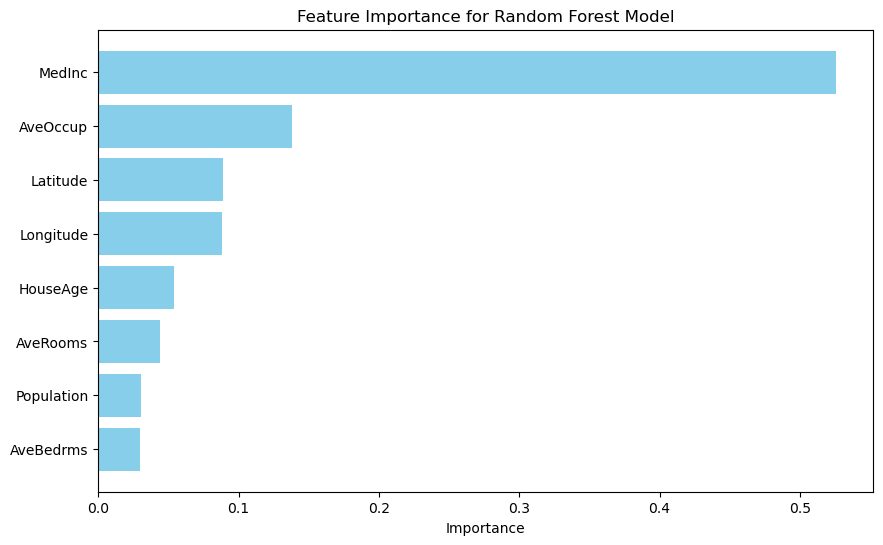

In [85]:
# Visuals for importance

plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'],feature_importance_df['Importance'],color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Random Forest Model')
plt.gca().invert_yaxis() # Invert for better readability
plt.show()


In [81]:
# Save the model
import joblib

joblib.dump(best_rf,'random_forest_refined_model.joblib')

['random_forest_refined_model.joblib']

In [83]:
import os
print(os.getcwd())

C:\Users\kra


In [89]:
# Creating the interaction term

df['MedInc_Latitude'] = df['MedInc'] * df['Latitude']

X_train['MedInc_Latitude'] = X_train['MedInc'] * X_train['Latitude']
X_test['MedInc_Latitude'] = X_test['MedInc'] * X_test['Latitude']

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

#Evaluation

rf_mse = mean_squared_error(y_test,rf_predictions)
rf_rmse=np.sqrt(rf_mse)
rf_r2 = r2_score(y_test,rf_predictions)

print(f'MSE:{rf_mse},RMSE:{rf_mse},r2_score{rf_r2}')

MSE:0.2583965300131202,RMSE:0.2583965300131202,r2_score0.802812301881514


In [ ]:
# Conclusion from the interaction term,, the Model performs poorly as compared to before.